In [4]:
import pandas
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = (15, 7)

In [6]:
data = pandas.read_csv('../../datasets/dataset-2.csv')
data.head()

,tempo_telefone,clientes
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [7]:
data['tmp_atend'] = data.apply(lambda df: df['tempo_telefone'] / df['clientes'], axis=1)
data.head()

,tempo_telefone,clientes,tmp_atend
0,3.600,79,0.045570
1,1.800,54,0.033333
2,3.333,74,0.045041
3,2.283,62,0.036823
4,4.533,85,0.053329


In [8]:
data.describe()

,tempo_telefone,clientes,tmp_atend
count,272.000000,272.000000,272.000000
mean,3.487783,70.897059,0.048052
std,1.141371,13.594974,0.009350
min,1.600000,43.000000,0.026047
25%,2.162750,58.000000,0.039674
50%,4.000000,76.000000,0.050000
75%,4.454250,82.000000,0.055557
max,5.100000,96.000000,0.066671


In [9]:
data['decile'] = pandas.qcut(data['tempo_telefone'], 10, False)
data.head(10)

,tempo_telefone,clientes,tmp_atend,decile
0,3.600,79,0.045570,3
1,1.800,54,0.033333,0
2,3.333,74,0.045041,3
3,2.283,62,0.036823,2
4,4.533,85,0.053329,7
5,2.883,55,0.052418,3
6,4.700,88,0.053409,8
7,3.600,85,0.042353,3
8,1.950,51,0.038235,1
9,4.350,85,0.051176,6


In [10]:
data[['tempo_telefone', 'clientes']].corr()

,tempo_telefone,clientes
tempo_telefone,1.000000,0.900811
clientes,0.900811,1.000000


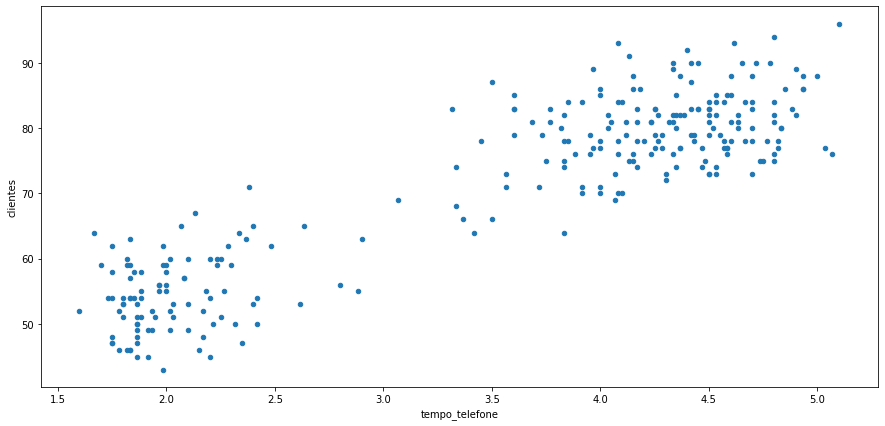

In [11]:
data.plot.scatter(x='tempo_telefone', y='clientes')

In [12]:
data['round'] = data.tempo_telefone.round(1)
data.head()

,tempo_telefone,clientes,tmp_atend,decile,round
0,3.600,79,0.045570,3,3.6
1,1.800,54,0.033333,0,1.8
2,3.333,74,0.045041,3,3.3
3,2.283,62,0.036823,2,2.3
4,4.533,85,0.053329,7,4.5


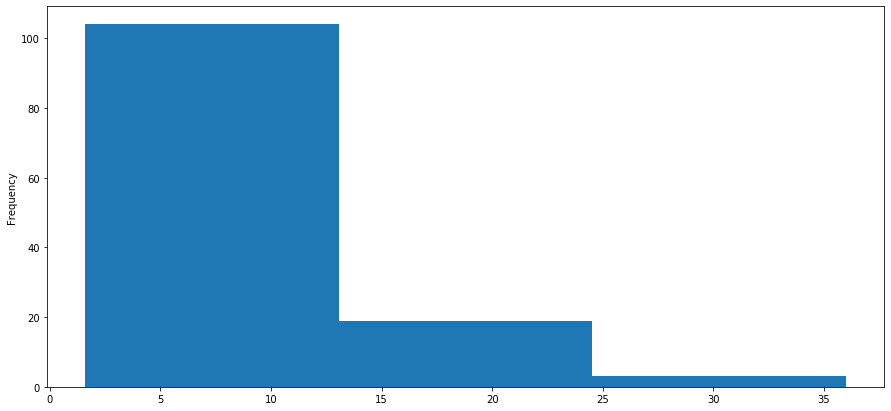

In [13]:
freq_abs = data.groupby('tempo_telefone')['tempo_telefone'].sum()
freq_abs.sort_values(ascending=True).plot.hist(bins=3)

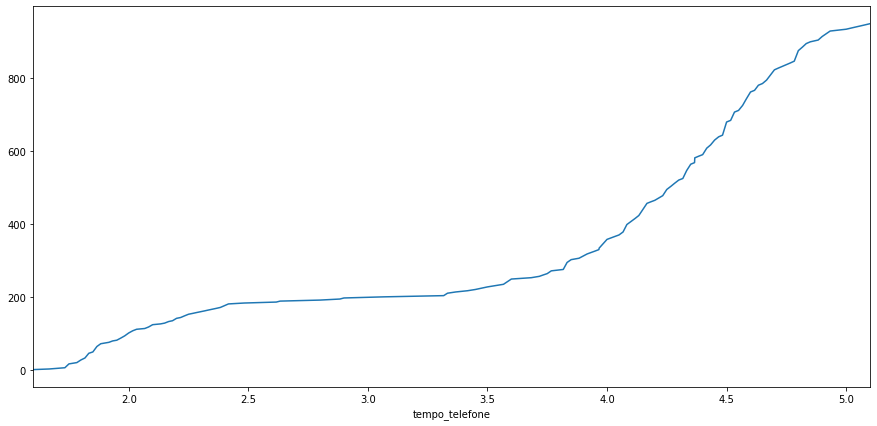

In [14]:
freq_abs.cumsum(axis = 0).plot.line()